# Author - Mehul Sharma


## Beginner Task


### Task-1 - Iris Flower Classification :

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC,LinearSVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [49]:
#importing the data from csv file to the notebook

dp=pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\LGM\IRIS\bezdekIris.data",
               names=["Sepal_Length(Cm)","Sepal_Width(Cm)","Petal_Length(Cm)","Petal_Width(Cm)","Species_Flower(Cm)"])
print(dp)

     Sepal_Length(Cm)  Sepal_Width(Cm)  Petal_Length(Cm)  Petal_Width(Cm)  \
0                 5.1              3.5               1.4              0.2   
1                 4.9              3.0               1.4              0.2   
2                 4.7              3.2               1.3              0.2   
3                 4.6              3.1               1.5              0.2   
4                 5.0              3.6               1.4              0.2   
..                ...              ...               ...              ...   
145               6.7              3.0               5.2              2.3   
146               6.3              2.5               5.0              1.9   
147               6.5              3.0               5.2              2.0   
148               6.2              3.4               5.4              2.3   
149               5.9              3.0               5.1              1.8   

    Species_Flower(Cm)  
0          Iris-setosa  
1          Iris-setosa  


In [50]:
#shows the first 10 index information
dp.head(10)

,Sepal_Length(Cm),Sepal_Width(Cm),Petal_Length(Cm),Petal_Width(Cm),Species_Flower(Cm)
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [51]:
dp.tail()


,Sepal_Length(Cm),Sepal_Width(Cm),Petal_Length(Cm),Petal_Width(Cm),Species_Flower(Cm)
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [52]:
#gives the info about the columns
dp.columns

Index(['Sepal_Length(Cm)', 'Sepal_Width(Cm)', 'Petal_Length(Cm)',
       'Petal_Width(Cm)', 'Species_Flower(Cm)'],
      dtype='object')

In [53]:
#tells the shape of the data structure
dp.shape

(150, 5)

In [54]:
## If any of the above value comes True that means that is the missing Values.
dp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sepal_Length(Cm)    150 non-null    float64
 1   Sepal_Width(Cm)     150 non-null    float64
 2   Petal_Length(Cm)    150 non-null    float64
 3   Petal_Width(Cm)     150 non-null    float64
 4   Species_Flower(Cm)  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [55]:
# Check for null or missing value
dp.isnull()

,Sepal_Length(Cm),Sepal_Width(Cm),Petal_Length(Cm),Petal_Width(Cm),Species_Flower(Cm)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [56]:
#counting the total values in column species
dp['Species_Flower(Cm)'].value_counts()


Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species_Flower(Cm), dtype: int64

In [57]:
#displaying the distinct values of species flower 
dp['Species_Flower(Cm)'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [58]:
#description of the above data 
dp.describe()

,Sepal_Length(Cm),Sepal_Width(Cm),Petal_Length(Cm),Petal_Width(Cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Data Visualization

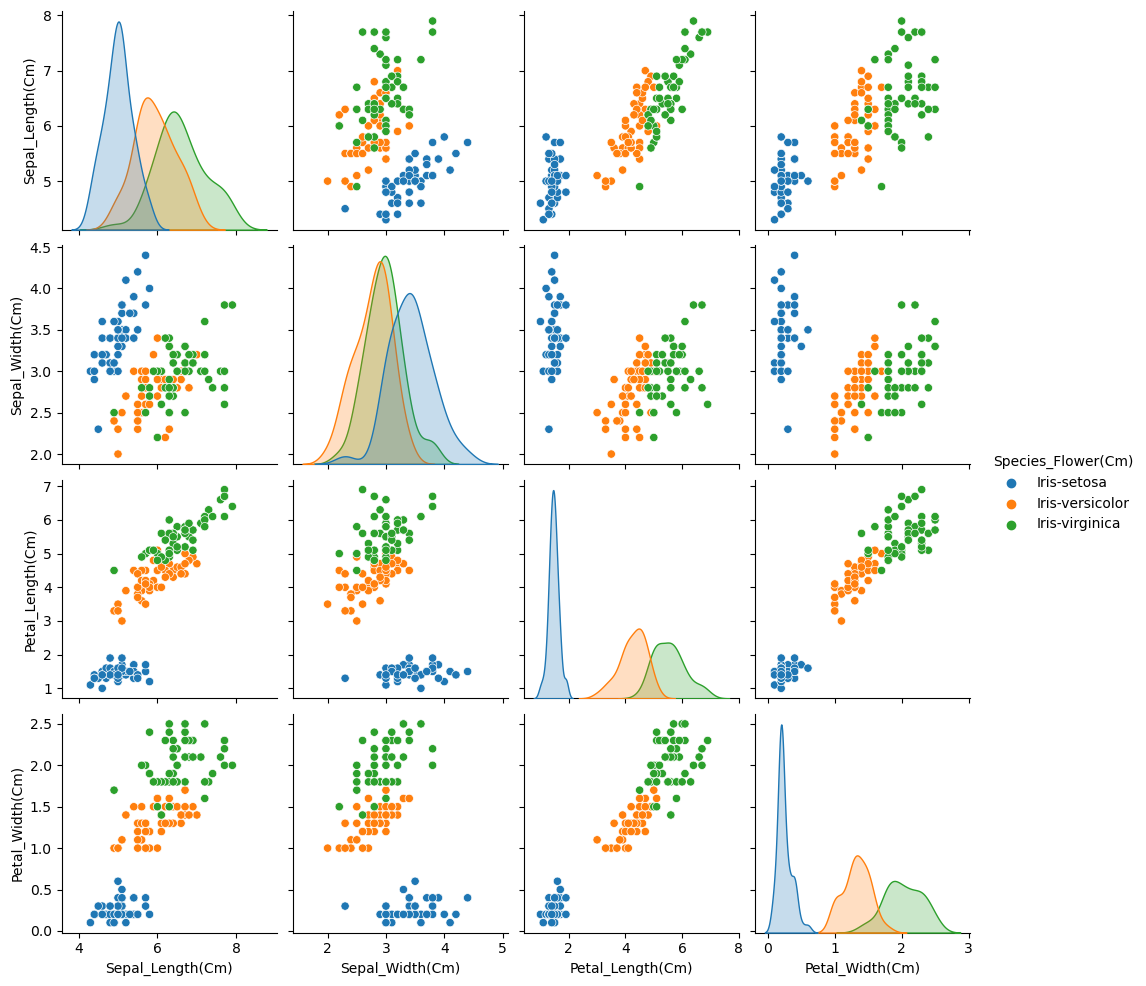

In [59]:
#various plot of flower species
t=sns.pairplot(dp,hue="Species_Flower(Cm)")
plt.show()

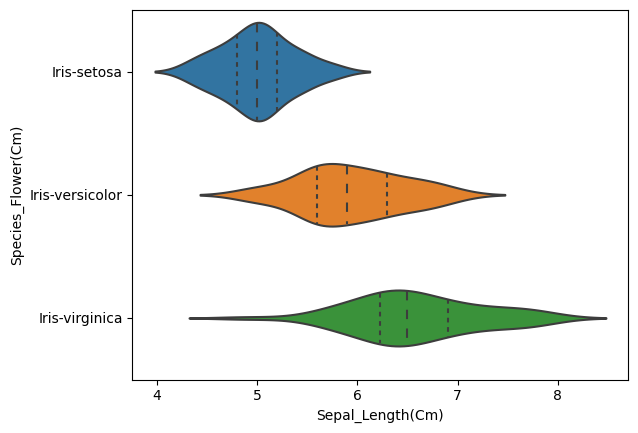

In [60]:
#displaying the sepal length
t = sns.violinplot(y='Species_Flower(Cm)', x='Sepal_Length(Cm)', data=dp, inner='quartile')
plt.show()


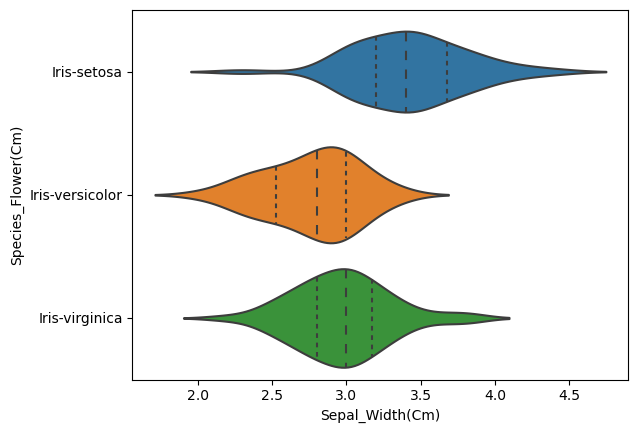

In [61]:
#displaying the sepal width
t=sns.violinplot(y='Species_Flower(Cm)', x='Sepal_Width(Cm)', data=dp, inner='quartile')
plt.show()


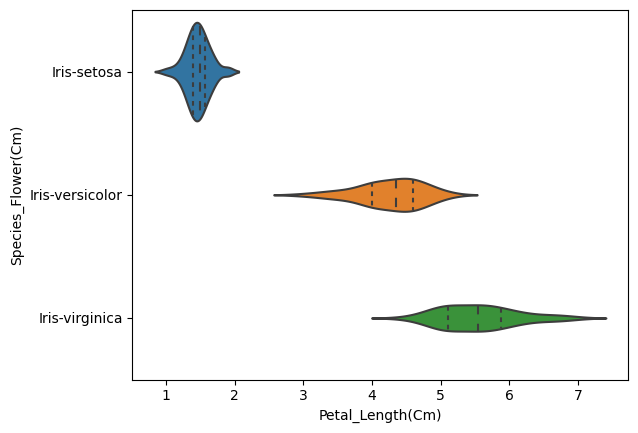

In [62]:
#displaying the petal length 
t=sns.violinplot(y='Species_Flower(Cm)', x='Petal_Length(Cm)', data=dp, inner='quartile')
plt.show()


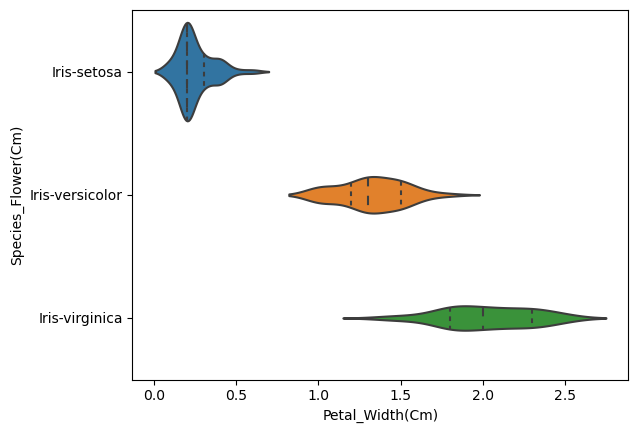

In [63]:
#displaying the petal width
t=sns.violinplot(y='Species_Flower(Cm)', x='Petal_Width(Cm)', data=dp, inner='quartile')
plt.show()

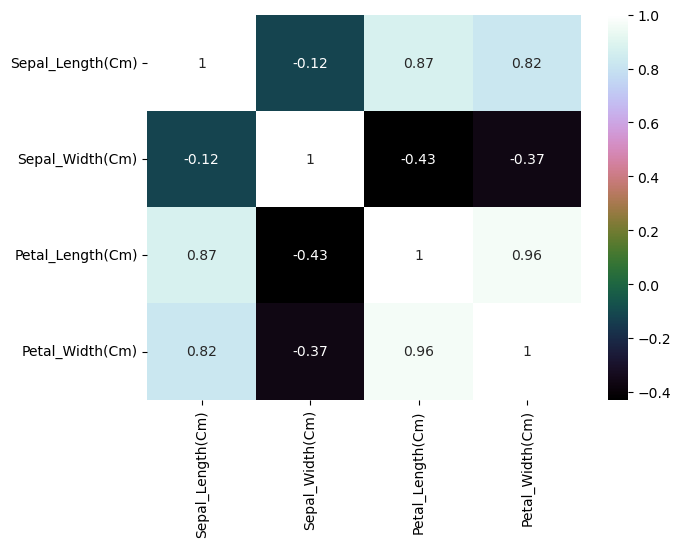

In [64]:
fig=plt.gcf()
fig.set_size_inches(7,5)
sns.heatmap(dp.corr(), annot=True,cmap='cubehelix')
plt.show()

## Training and Testing

In [65]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [66]:
dp["Species_Flower(Cm)"] = le.fit_transform =(dp["Species_Flower(Cm)"])
dp.head(10)

,Sepal_Length(Cm),Sepal_Width(Cm),Petal_Length(Cm),Petal_Width(Cm),Species_Flower(Cm)
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [67]:
data=dp.values
X=data[:,0:4]
Y=data[:,4]
print(Y)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor

In [68]:
from sklearn.model_selection import train_test_split
X = dp.drop(columns=['Species_Flower(Cm)'])
Y = dp['Species_Flower(Cm)']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)
print(Y_test)

57     Iris-versicolor
22         Iris-setosa
143     Iris-virginica
21         Iris-setosa
85     Iris-versicolor
12         Iris-setosa
55     Iris-versicolor
80     Iris-versicolor
147     Iris-virginica
46         Iris-setosa
26         Iris-setosa
125     Iris-virginica
45         Iris-setosa
63     Iris-versicolor
18         Iris-setosa
38         Iris-setosa
61     Iris-versicolor
20         Iris-setosa
34         Iris-setosa
113     Iris-virginica
28         Iris-setosa
16         Iris-setosa
133     Iris-virginica
106     Iris-virginica
15         Iris-setosa
75     Iris-versicolor
111     Iris-virginica
13         Iris-setosa
100     Iris-virginica
94     Iris-versicolor
39         Iris-setosa
103     Iris-virginica
56     Iris-versicolor
58     Iris-versicolor
121     Iris-virginica
134     Iris-virginica
123     Iris-virginica
19         Iris-setosa
42         Iris-setosa
137     Iris-virginica
84     Iris-versicolor
79     Iris-versicolor
148     Iris-virginica
62     Iris

### Logistic Regression

In [69]:
model=LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [70]:
pred1=model.predict(X_test)
c=accuracy_score(Y_test,pred1)*100
print(c)


95.55555555555556


In [71]:
def report(model):
    preds=model.predict(X_test)
    print(classification_report(preds,Y_test))


In [72]:
print('Logistic Regression')
report(model)
print(f'Accuracy: {round(c*100,2)}%')

Logistic Regression
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       1.00      0.87      0.93        15
 Iris-virginica       0.87      1.00      0.93        13

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.95        45
   weighted avg       0.96      0.96      0.96        45

Accuracy: 9555.56%


### KNN

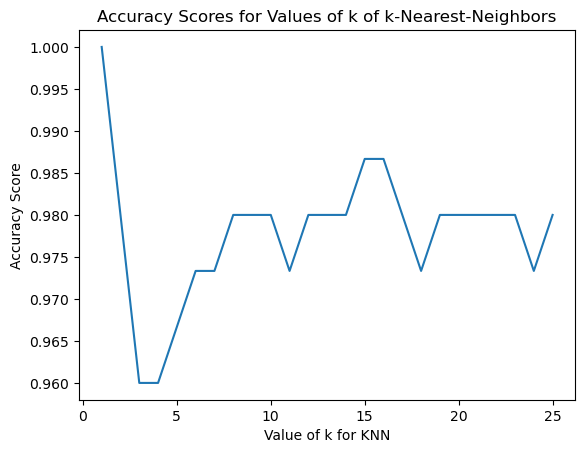

In [73]:
# KNN (K-nearest Neighbor)

k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X,Y)
    Y_pred = knn.predict(X)
    scores.append(accuracy_score(Y, Y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()   

In [74]:
from sklearn.metrics import confusion_matrix
cm  =  confusion_matrix(Y,Y_pred)

In [75]:
cm

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  1, 49]], dtype=int64)

### Splitting the datasets 

In [76]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


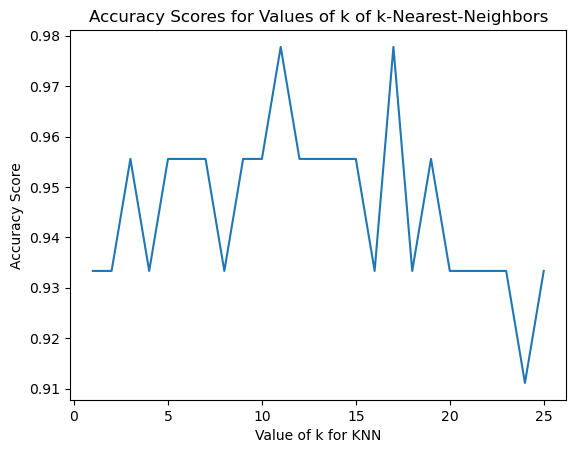

In [77]:
# experimenting with different n values
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    scores.append(accuracy_score(Y_test, Y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [78]:
logr = LogisticRegression()
logr.fit(X_train, Y_train)
Y_pred = logr.predict(X_test)
print(accuracy_score(Y_test, Y_pred))

0.9555555555555556


In [79]:
# A detail classification report 

In [80]:
print(classification_report(Y_test,pred1))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       0.87      1.00      0.93        13
 Iris-virginica       1.00      0.87      0.93        15

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.95        45
   weighted avg       0.96      0.96      0.96        45



In [81]:
# prediction of the species from the input vector
knn = KNeighborsClassifier(n_neighbors=10,p=2, metric="minkowski")
knn.fit(X,Y)
knn.predict([[5.1,3.8,1.5,0.3]])


array(['Iris-setosa'], dtype=object)